<a href="https://colab.research.google.com/github/artunam/Projects/blob/main/PROJECT_REGRESSION_J4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [3]:
datos_df=pd.read_excel("https://github.com/artunam/Projects/raw/main/DATOS_J4.xlsx")
datos_df.head(31)

,PUNTOS,CLASIFICAR
0,6,1
1,6,1
2,4,1
3,10,1
4,5,0
5,6,1
6,4,0
7,9,1
8,7,1
9,7,1


In [4]:
from sklearn import linear_model
modelo_logistico=linear_model.LogisticRegression().fit(datos_df[['PUNTOS']],datos_df[['CLASIFICAR']])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
modelo_logistico.intercept_,modelo_logistico.coef_

(array([-1.83866046]), array([[0.42928097]]))

In [6]:
#modelo_logistico.predict esto nos ayuda a predecir el valor dicotomico
#modelo_logistico.predict_log_proba esto nos ayuda a predecir el logit ((ln(p/q))
#modelo_logistico.predict_proba y este nos regresa la probabilidad de la predicción

In [7]:
x_curve=pd.DataFrame(np.linspace(-10,15,300),columns=['PUNTOS'])
x_curve
y_curve= modelo_logistico.predict_proba(x_curve[['PUNTOS']])[:,1]
y_curve
datos_df['y_hat']=modelo_logistico.predict(datos_df[['PUNTOS']])
datos_df.head(80)

,PUNTOS,CLASIFICAR,y_hat
0,6,1,1
1,6,1,1
2,4,1,0
3,10,1,1
4,5,0,1
5,6,1,1
6,4,0,0
7,9,1,1
8,7,1,1
9,7,1,1


x_curve=pd.DataFrame(np.linspace(-20,20,300),columns=['PUNTOS'])
x_curve
y_curve= modelo_logistico.predict_proba(x_curve[['PUNTOS']])[:,1]
y_curve
datos_df['y_hat']=modelo_logistico.predict(datos_df[['PUNTOS']])
datos_df.head(80)

Text(0.5, 1.0, 'Regresión logística')

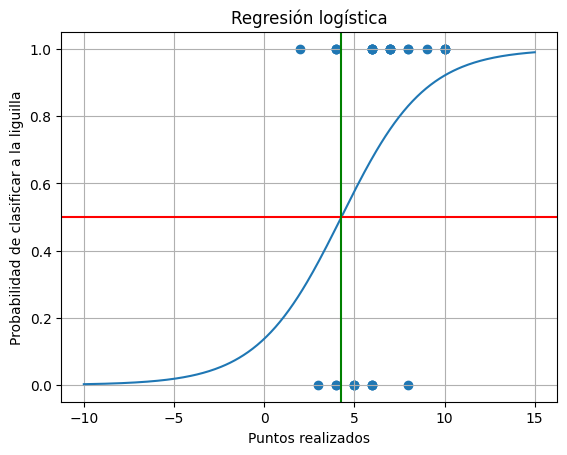

In [8]:
plt.grid()
plt.scatter(datos_df['PUNTOS'],datos_df['CLASIFICAR'])
plt.plot(x_curve[['PUNTOS']],y_curve)
plt.axhline(y=.5,color='r')
plt.axvline(x=4.25,color='g')
plt.xlabel('Puntos realizados')
plt.ylabel('Probabilidad de clasificar a la liguilla')
plt.title('Regresión logística')

In [9]:
modelo_logistico.predict([[2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [11]:
from sklearn import metrics

In [12]:
accuracy=metrics.accuracy_score(datos_df['CLASIFICAR'],datos_df['y_hat'])
accuracy

0.6451612903225806

In [13]:
matriz_de_confusion=metrics.confusion_matrix(datos_df['CLASIFICAR'],datos_df['y_hat'])
matriz_de_confusion

array([[ 3,  7],
       [ 4, 17]])

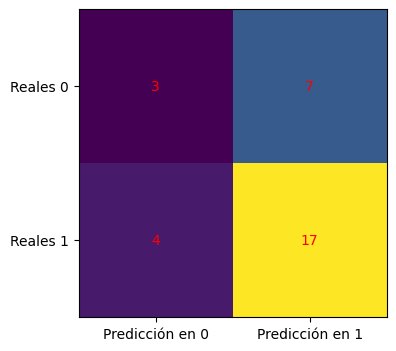

In [14]:
cm=metrics.confusion_matrix(datos_df['CLASIFICAR'],datos_df['y_hat'])
fig, ax=plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicción en 0','Predicción en 1'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Reales 0','Reales 1'))
ax.set_ylim(1.5,-.5)
for i in range(2):
  for j in range(2):
    ax.text(j,i,cm[i,j], ha='center',va='center',color='red')

Text(0, 0.5, 'Tasa de verdaderos positivos')

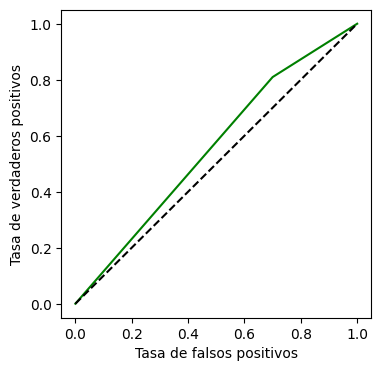

In [15]:
from sklearn.metrics import roc_curve, auc
#false true rate
#true positive rate
ftr,tpr,threshols=roc_curve(datos_df['CLASIFICAR'],datos_df['y_hat'])
roc_auc=auc(ftr,tpr)
plt.figure(figsize=(4,4))
plt.plot(ftr,tpr,color='g',label='Curva ROC (AUC)=%0.2f'% roc_auc)
plt.plot([0,1],[0,1],color='black',linestyle='--')
roc_auc
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')


In [16]:
roc_auc

0.5547619047619048